<p style="text-align: center;font-size: 40pt">Lie algebra</p>

In [2]:
%matplotlib widget
#%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


import numpy as np

import ipywidgets as widgets

%run ./scripts/helper_func.py
path = "{0}/lessons/transformations_2d/scripts/helper_func.py".format(get_root_path())
%run $path
path = "{0}/common/scripts/style.py".format(get_root_path())
%run $path

# Overview 

Requirements
- [Special Euclidean Group in 3D](5-lesson_se3.ipynb)

Objectives of this lesson:

- TODO


Hidden custom latex commands here $ \curvearrowright$

----
[comment]: <> (General commands)
$\newcommand{\textcomma}{\quad\text{,}}$
$\newcommand{\textdot}{\quad\text{.}}$
$\newcommand{\vec}[1]{\overrightarrow{#1}}$
$\newcommand{\mat}[1]{\mathbf{#1}}$
$\newcommand{\frame}[1]{\mathcal{#1}}$
$\newcommand{\point}[2][]{{}^{#1}\mathbf{#2}}$
$\newcommand{\pointsym}[2][]{{}^{#1}\boldsymbol{#2}}$
$\newcommand{\matsym}[1]{\boldsymbol{#1}}$
$\newcommand{\real}{\mathbb{R}}$
$\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}$
$\newcommand{\F}[2][]{{}_{#2}^{#1}\mathscr{F}}$
$\newcommand{\Fmat}[2][]{{}_{#2}^{#1}\mat{F}}$
$\newcommand{\origin}[2][]{{}_{#2}^{#1}\mat{o}}$
$\newcommand{\T}[2][]{{}_{#2}^{#1}\mat{T}}$
$\newcommand{\t}[2][]{{}_{#2}^{#1}\mat{t}}$
$\newcommand{\R}[2][]{{}_{#2}^{#1}\mat{R}}$
$\newcommand{\f}{\vec{\mathscr{f}}}$
$\newcommand{\ax}[2][]{{}_{#2}^{#1}\vec{\mathscr{x}}}$
$\newcommand{\ay}[2][]{{}_{#2}^{#1}\vec{\mathscr{y}}}$
$\newcommand{\az}[2][]{{}_{#2}^{#1}\vec{\mathscr{z}}}$
$\newcommand{\aw}[2][]{{}_{#2}^{#1}\vec{\mathscr{w}}}$
$\newcommand{\axi}{\mathscr{x}}$
$\newcommand{\ayi}{\mathscr{y}}$
$\newcommand{\azi}{\mathscr{z}}$
$\newcommand{\awi}{\mathscr{w}}$
$\newcommand{\pointx}[2][]{{}^{#1}{#2}_{\axi}}$
$\newcommand{\pointy}[2][]{{}^{#1}{#2}_{\ayi}}$
$\newcommand{\pointz}[2][]{{}^{#1}{#2}_{\azi}}$
$\newcommand{\SO}[1]{\mathrm{SO}(#1)}$
----

This lesson is under construction.
This is why it is considered as extra material and won't be covered by the exam.

# Approximating trigonometry functions

Taylor series:

\begin{aligned}
\sin \theta & = \theta - \frac{\theta^3}{3!} + \frac{\theta^5}{5!} - \frac{\theta^7}{7!} + \cdots \\
& = \sum_{n=0}^\infty \frac{(-1)^n \theta^{2n+1}}{(2n+1)!} \\
\cos \theta & = 1 - \frac{\theta^2}{2!} + \frac{\theta^4}{4!} - \frac{\theta^6}{6!} + \cdots \\
& = \sum_{n=0}^\infty \frac{(-1)^n \theta^{2n}}{(2n)!}
\end{aligned}

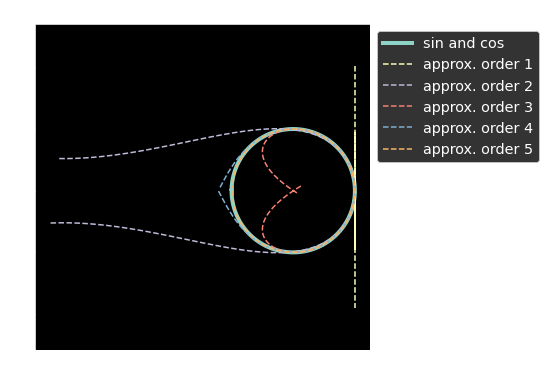

In [5]:
def approx_sin(theta, order):
    res = 0
    # approximation of sin at order one is considered to be theta, not zero
    for n in range(order+1):
        exp = 2*n+1
        res = res + (((-1)**n) * (theta**exp))/np.math.factorial(exp)
    return res

def approx_cos(theta, order):
    res = 0
    for n in range(order):
        exp = 2*n
        res = res + (((-1)**n) * (theta**exp))/np.math.factorial(exp)
    return res

theta = np.arange(-np.pi, np.pi, 0.05)
x = np.cos(theta)
y = np.sin(theta)



%matplotlib inline
    
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)
ax = ax1
ax.set_title(r"Approximation of trigonomety functions")

ax.plot(x, y, lw=4)
legend_str = ["sin and cos"]

for i in range(5):
    order = i+1
    x_approx = approx_cos(theta, order)
    y_approx = approx_sin(theta, order)
    ax.plot(x_approx, y_approx, '--')
    legend_str.append("approx. order %i" % order)
    
ax.axis('equal')
ax.legend(legend_str, bbox_to_anchor=(1, 1))

# Approximation small angles

\begin{aligned}
\R{}_\axi (\theta)
= \bmat{ 
1 & 0 & 0
\\
0 & \cos \theta & -\sin \theta
\\ 
0 & \sin \theta & \cos \theta
\\
}
\quad
\R{}_\ayi (\theta)
= \bmat{ 
\cos \theta & 0 & \sin \theta
\\ 
0 & 1 & 0
\\
-\sin \theta & 0 & \cos \theta
\\
}
\quad
\R{}_\azi (\theta)
= \bmat{ 
\cos \theta & -\sin \theta & 0
\\
\sin \theta & \cos \theta & 0
\\ 
0 & 0 & 1
\\
}
\textdot
\end{aligned}